In [1]:
import pandas as pd
from Bio import SeqIO
import glob

### metadata: genome

In [3]:
df_0 = pd.read_excel(
    "../dataset/AllSatellitesTables.xlsx", sheet_name="PICI", engine="openpyxl"
)
print(df_0.shape)
print(df_0.columns)

In [31]:
metadata = pd.read_csv("../dataset/PICI_GenomicNucInfo_060723.csv")
print(metadata.shape)
print(metadata.columns)

(1435, 6)
Index(['Unnamed: 0', 'PICI_ID', 'Host_ID', 'Host_strain', 'Host_Ref',
       'Genomic_region'],
      dtype='object')


In [72]:
metadata["PICI_ID_allsets"] = metadata["PICI_ID"].str.split(".Set", n=1).str[0]
cols = ["PICI_ID_allsets"] + [
    col for col in metadata.columns if col != "PICI_ID_allsets"
]
metadata = metadata[cols]
metadata = metadata.drop(columns=["Unnamed: 0"])

In [73]:
metadata

,PICI_ID_allsets,PICI_ID,Host_ID,Host_strain,Host_Ref,Genomic_region
0,STAU002.0321.00050.C001.PICI.TypeB.variant0002,STAU002.0321.00050.C001.PICI.TypeB.variant0002...,STAU002.0321.00050.C001,Staphylococcus aureus strain HOU1444-VR chromo...,GCF_001278745.1,"(401962, 412834)"
1,POSP014.0321.00001.C001.PICI.TypeB.variant0001,POSP014.0321.00001.C001.PICI.TypeB.variant0001...,POSP014.0321.00001.C001,"Polaromonas sp. JS666, complete sequence.",GCF_000013865.1,"(3126147, 3132812)"
2,STAU002.0321.00250.C001.PICI.TypeB.variant0002,STAU002.0321.00250.C001.PICI.TypeB.variant0002...,STAU002.0321.00250.C001,Staphylococcus aureus subsp. aureus strain 80w...,GCF_003944865.1,"(814785, 826925)"
3,STAU002.0321.00374.C001.PICI.TypeB.variant0002,STAU002.0321.00374.C001.PICI.TypeB.variant0002...,STAU002.0321.00374.C001,Staphylococcus aureus strain UP_1150 chromosom...,GCF_009912535.1,"(2745923, 2756343)"
4,MYTU002.0321.00238.C001.PICI.TypeB.variant0004,MYTU002.0321.00238.C001.PICI.TypeB.variant0004...,MYTU002.0321.00238.C001,Mycobacterium tuberculosis strain DKC2 isolate...,GCF_900520315.1,"(105183, 113045)"
...,...,...,...,...,...,...
1430,STSA003.0321.00008.C001.PICI.TypeB.variant0002,STSA003.0321.00008.C001.PICI.TypeB.variant0002...,STSA003.0321.00008.C001,Staphylococcus saprophyticus strain UTI-056 ch...,GCF_013341435.1,"(2129, 11546)"
1431,STSI001.0321.00003.C001.PICI.TypeB.variant0001,STSI001.0321.00003.C001.PICI.TypeB.variant0001...,STSI001.0321.00003.C001,"Staphylococcus simulans strain MR3, complete s...",GCF_003006055.1,"(1027781, 1037385)"
1432,STSI001.0321.00004.C001.PICI.TypeB.variant0001,STSI001.0321.00004.C001.PICI.TypeB.variant0001...,STSI001.0321.00004.C001,"Staphylococcus simulans strain MR4, complete s...",GCF_003006075.1,"(1027781, 1037385)"
1433,STSI001.0321.00005.C001.PICI.TypeB.variant0001,STSI001.0321.00005.C001.PICI.TypeB.variant0001...,STSI001.0321.00005.C001,"Staphylococcus simulans strain MR2, complete s...",GCF_003076375.1,"(1027882, 1037486)"


In [74]:
duplicated_sets = metadata.groupby("PICI_ID_allsets")["PICI_ID"].nunique()
duplicated_sets = duplicated_sets[duplicated_sets > 1].index
duplicate_rows = metadata[metadata["PICI_ID_allsets"].isin(duplicated_sets)]
duplicate_rows = duplicate_rows.sort_values(["PICI_ID_allsets", "PICI_ID"])

In [79]:
duplicate_rows.to_csv("../dataset/duplicate_picis.csv", index=False)

In [77]:
print(len(metadata["PICI_ID_allsets"].unique()))
print(len(metadata["PICI_ID"].unique()))
print(len(duplicate_rows["PICI_ID_allsets"].unique()))
print(len(duplicate_rows["PICI_ID"].unique()))
# 1435 - 1286 = 287 - 138 = 149

1286
1435
138
287


### metadata: protein

In [22]:
seqs = list(SeqIO.parse("../dataset/PICI_NucSequences_060723.fst", "fasta"))
print(len(seqs))
print("first sample:")
print(seqs[0])

1435
first sample:
ID: STAU002.0321.00050.C001.PICI.TypeB.variant0002.Set1
Name: STAU002.0321.00050.C001.PICI.TypeB.variant0002.Set1
Description: STAU002.0321.00050.C001.PICI.TypeB.variant0002.Set1
Number of features: 0
Seq('TAACTCCCTATCCCCTCTAATTTATTCATCATATCTTGTGCCATTTTATCCGTA...TGA')


In [29]:
seqs_prt_1 = list(
    SeqIO.parse(
        "../dataset/SatelliteProteomes/ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1.prt",
        "fasta",
    )
)
print(len(seqs_prt_1))
print(seqs_prt_1[0])

8
ID: ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1_00
Name: ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1_00
Description: ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1_00 ACER001.0321.00001.C001_00176 C ATG TGA 197540 198730 Valid CDG81_RS00890 1191 @WP_084133721.1@ CDG81_RS00890 1 197540 198730 | site-specific integrase  (translation)
Number of features: 0
Seq('MARVWIEDRSSHSGYKQALAQAKTSRKAAPGRWRVRWYDQEGKPKSQTFSRKPD...DQM')


In [2]:
data_prt = []

prt_files = glob.glob("../dataset/SatelliteProteomes/*.prt")

for prt_file in prt_files:
    sequences = list(SeqIO.parse(prt_file, "fasta"))

    for seq in sequences:
        # Extract function (part after the last '|')
        function = (
            seq.description.split("|")[-1].strip() if "|" in seq.description else ""
        )

        # Extract PICI_ID (everything before the last underscore in Protein_ID)
        pici_id = "_".join(seq.id.split("_")[:-1])

        # Create dictionary for this entry
        entry = {
            "PICI_ID": pici_id,
            "Protein_ID": seq.id,
            "Function": function,
            "Description": seq.description,
        }

        data_prt.append(entry)

df_prt = pd.DataFrame(data_prt)

In [38]:
df_prt["PICI_ID_allsets"] = df_prt["PICI_ID"].str.split(".Set", n=1).str[0]
cols = ["PICI_ID_allsets"] + [col for col in df_prt.columns if col != "PICI_ID_allsets"]
df_prt = df_prt[cols]

In [40]:
df_prt.to_csv("../dataset/PICI_proteins.csv", index=False)

In [3]:
df_prt = pd.read_csv("../dataset/PICI_proteins.csv")

In [4]:
df_prt.head()

,PICI_ID_allsets,PICI_ID,Protein_ID,Function,Description
0,MYTU002.0321.00124.C001.PICI.TypeB.variant0003,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,site-specific integrase (translation),MYTU002.0321.00124.C001.PICI.TypeB.variant0003...
1,MYTU002.0321.00124.C001.PICI.TypeB.variant0003,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,hypothetical protein (translation),MYTU002.0321.00124.C001.PICI.TypeB.variant0003...
2,MYTU002.0321.00124.C001.PICI.TypeB.variant0003,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,helix-turn-helix domain-containing protein (t...,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...
3,MYTU002.0321.00124.C001.PICI.TypeB.variant0003,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,DUF2742 domain-containing protein (translation),MYTU002.0321.00124.C001.PICI.TypeB.variant0003...
4,MYTU002.0321.00124.C001.PICI.TypeB.variant0003,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,MYTU002.0321.00124.C001.PICI.TypeB.variant0003...,DUF3631 domain-containing protein (translation),MYTU002.0321.00124.C001.PICI.TypeB.variant0003...


In [43]:
print(len(df_prt["PICI_ID_allsets"].unique()))
print(len(df_prt["PICI_ID"].unique()))
print(len(df_prt["Protein_ID"].unique()))
print(len(df_prt["Description"].unique()))
print(len(df_prt["Function"].unique()))

1287
1435
20594
20594
287


### protein function

In [8]:
function_counts = pd.read_csv("../results/proteins_all_function_counts.tsv", sep="\t")

In [7]:
# function_counts = df_prt["Function"].value_counts().reset_index(name="Count")

In [9]:
function_counts

,Function,count
0,hypothetical protein (translation),8173
1,site-specific integrase (translation),984
2,terminase small subunit (translation),797
3,helix-turn-helix transcriptional regulator (t...,764
4,helix-turn-helix domain-containing protein (t...,746
...,...,...
282,DUF2004 domain-containing protein (translation),1
283,TrmB family transcriptional regulator (transl...,1
284,antitermination protein (translation),1
285,ORF6N domain-containing protein (translation),1


In [28]:
integrase_count = function_counts[function_counts["Function"].str.contains("integrase")]
integrase_count.to_csv("../dataset/proteins_integrases.csv", index=False)
alpa_count = function_counts[function_counts["Function"].str.contains("AlpA")]
alpa_count.to_csv("../dataset/proteins_AlpA.csv", index=False)
capsid_count = function_counts[function_counts["Function"].str.contains("capsid")]
capsid_count.to_csv("../dataset/proteins_capsid.csv", index=False)

In [5]:
pici_functions = df_prt.groupby("PICI_ID")["Function"].agg(list)


def check_functions(func_list):
    func_str = " ".join(func_list).lower()
    return "alpa" in func_str


# ("integrase" in func_str) and ('capsid' not in func_str)

filtered_picis = pici_functions[pici_functions.apply(check_functions)]

result_df = pd.DataFrame(
    {"PICI_ID": filtered_picis.index, "All_Functions": filtered_picis.values}
)

In [54]:
result_df.to_csv("../results/picis_integrase_alpa.csv", index=False)

### cfpici

In [ ]:
df_prt = pd.read_csv("../dataset/PICI_proteins.csv")

In [28]:
# df_prt[
#     df_prt["PICI_ID"].str.contains("CFPICI") & df_prt["Function"].str.contains("capsid")
# ]
len(df_prt[df_prt["PICI_ID"].str.contains("CFPICI")]["PICI_ID"].unique())
# there are 30 cfpici among 1435 picis

30

In [9]:
seqs = list(SeqIO.parse("../dataset/PICI_NucSequences_060723.fst", "fasta"))
print(seqs[0])

ID: STAU002.0321.00050.C001.PICI.TypeB.variant0002.Set1
Name: STAU002.0321.00050.C001.PICI.TypeB.variant0002.Set1
Description: STAU002.0321.00050.C001.PICI.TypeB.variant0002.Set1
Number of features: 0
Seq('TAACTCCCTATCCCCTCTAATTTATTCATCATATCTTGTGCCATTTTATCCGTA...TGA')


In [12]:
for seq in seqs:
    if seq.description == "SIME002.0321.00024.C001.PICI.TypeB.variant0001.SetR1":
        print(seq)
        print(len(seq.seq))
        break

ID: SIME002.0321.00024.C001.PICI.TypeB.variant0001.SetR1
Name: SIME002.0321.00024.C001.PICI.TypeB.variant0001.SetR1
Description: SIME002.0321.00024.C001.PICI.TypeB.variant0001.SetR1
Number of features: 0
Seq('TATCGAACCAGCGCGAACAGGCTGGCGTCCGGCTCCGGAGCGATCGGAAGCGGT...TAG')
22394


In [6]:
pici_30 = list(
    [
        "SIME002.0321.00024.C001.PICI.TypeB.variant0001.SetR1",
        "SIME002.0321.00009.C001.PICI.TypeB.variant0001.SetR1",
        "STSI001.0321.00005.C001.PICI.TypeB.variant0001.SetR1",
        "LAPL001.0321.00074.C001.PICI.TypeB.variant0003.SetR1",
        "SIME002.0321.00018.C001.PICI.TypeB.variant0001.SetR1",
        "STSI001.0321.00003.C001.PICI.TypeB.variant0001.SetR1",
        "LAPL001.0321.00073.C001.PICI.TypeB.variant0003.SetR1",
        "SIME002.0321.00002.C001.PICI.TypeB.variant0001.SetR1",
        "STAU002.0321.00280.C001.PICI.TypeB.variant0004.SetR1",
        "SPYA001.0321.00006.C001.PICI.TypeB.variant0001.SetR1",
        "ESCO001.0321.00563.C001.PICI.TypeA.SetR1",
        "ESCO001.0321.00097.C001.PICI.TypeA.SetR1",
        "CIFR005.0321.00052.C001.PICI.TypeB.variant0001.SetR1",
        "STSI001.0321.00004.C001.PICI.TypeB.variant0001.SetR1",
        "CIFR005.0321.00053.C001.PICI.TypeB.variant0001.SetR1",
        "DEVU001.0321.00001.C001.PICI.TypeB.variant0001.SetR1",
        "ESCO001.0321.00309.C001.PICI.TypeB.variant0001.SetR1",
        "ESCO001.0321.01281.C001.PICI.TypeA.SetR1",
        "DEVU001.0321.00001.C001.PICI.TypeB.variant0001.SetR2",
        "PAKO001.0321.00001.C001.PICI.TypeB.variant0004.SetR1",
        "DEVU001.0321.00004.C001.PICI.TypeB.variant0001.SetR1",
        "STSI001.0321.00006.C001.PICI.TypeB.variant0001.SetR1",
        "ESCO001.0321.00448.C001.PICI.TypeA.SetR1",
        "NIHA002.0321.00001.C001.PICI.TypeB.variant0001.SetR1",
        "RHET001.0321.00004.C001.PICI.TypeB.variant0001.SetR1",
        "CIFR005.0321.00101.C001.PICI.TypeB.variant0001.SetR1",
        "STAR001.0321.00001.C001.PICI.TypeB.variant0002.SetR1",
        "PAKO001.0321.00001.C002.PICI.TypeB.variant0004.SetR1",
        "CIAM001.0321.00007.C001.PICI.TypeB.variant0001.SetR1",
        "STSA003.0321.00008.C001.PICI.TypeB.variant0002.SetR1",
    ]
)
cfpici_30 = list(
    [
        "ESCO001.0321.01281.C001.CFPICI.TypeA.SetR1",
        "CIFR005.0321.00053.C001.CFPICI.TypeB.variant0001.SetR1",
        "STSA003.0321.00008.C001.CFPICI.TypeB.variant0002.SetR1",
        "DEVU001.0321.00001.C001.CFPICI.TypeB.variant0001.SetR1",
        "CIFR005.0321.00052.C001.CFPICI.TypeB.variant0001.SetR1",
        "DEVU001.0321.00004.C001.CFPICI.TypeB.variant0001.SetR1",
        "STSI001.0321.00003.C001.CFPICI.TypeB.variant0001.SetR1",
        "STSI001.0321.00004.C001.CFPICI.TypeB.variant0001.SetR1",
        "LAPL001.0321.00074.C001.CFPICI.TypeB.variant0003.SetR1",
        "ESCO001.0321.00097.C001.CFPICI.TypeA.SetR1",
        "DEVU001.0321.00001.C001.CFPICI.TypeB.variant0001.SetR2",
        "SPYA001.0321.00006.C001.CFPICI.TypeB.variant0001.SetR1",
        "STSI001.0321.00005.C001.CFPICI.TypeB.variant0001.SetR1",
        "RHET001.0321.00004.C001.CFPICI.TypeB.variant0001.SetR1",
        "ESCO001.0321.00309.C001.CFPICI.TypeB.variant0001.SetR1",
        "SIME002.0321.00002.C001.CFPICI.TypeB.variant0001.SetR1",
        "PAKO001.0321.00001.C002.CFPICI.TypeB.variant0004.SetR1",
        "STAU002.0321.00280.C001.CFPICI.TypeB.variant0004.SetR1",
        "SIME002.0321.00009.C001.CFPICI.TypeB.variant0001.SetR1",
        "STSI001.0321.00006.C001.CFPICI.TypeB.variant0001.SetR1",
        "CIFR005.0321.00101.C001.CFPICI.TypeB.variant0001.SetR1",
        "LAPL001.0321.00073.C001.CFPICI.TypeB.variant0003.SetR1",
        "SIME002.0321.00024.C001.CFPICI.TypeB.variant0001.SetR1",
        "ESCO001.0321.00563.C001.CFPICI.TypeA.SetR1",
        "STAR001.0321.00001.C001.CFPICI.TypeB.variant0002.SetR1",
        "ESCO001.0321.00448.C001.CFPICI.TypeA.SetR1",
        "CIAM001.0321.00007.C001.CFPICI.TypeB.variant0001.SetR1",
        "PAKO001.0321.00001.C001.CFPICI.TypeB.variant0004.SetR1",
        "NIHA002.0321.00001.C001.CFPICI.TypeB.variant0001.SetR1",
        "SIME002.0321.00018.C001.CFPICI.TypeB.variant0001.SetR1",
    ]
)
print(len(pici_30), len(cfpici_30))

30 30


In [7]:
# keep only 1405 picis from seqs excluding 30 cfpici
seqs = [seq for seq in seqs if seq.id not in cfpici_30]
len(seqs)

1435

In [ ]:
# 1405
# write to fasta
with open("../dataset/PICI_NucSequences_060723_no_cfpici.fst", "w") as f:
    for seq in seqs:
        f.write(f">{seq.id}\n{seq.seq}\n")

### function matrix

In [30]:
df_prt = pd.read_csv("../dataset/PICI_proteins.csv")

In [31]:
function_matrix = pd.pivot_table(
    df_prt,
    values="Protein_ID",
    index="PICI_ID",
    columns="Function",
    aggfunc="count",
    fill_value=0,
)

In [32]:
function_matrix.to_csv("../results/protein_function_matrix_old.csv", index=True)

In [35]:
print(function_matrix.sum().sum())  # should be same as df_prt.shape[0]
print(function_matrix.max().max())
print(function_matrix.min().min())
print(function_matrix.info())

20594
20
0
<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1 to XAAU001.0321.00001.C001.PICI.TypeB.variant0002.Set1
Columns: 287 entries, 1-aminocyclopropane-1-carboxylate deaminase  (translation) to zinc-binding protein  (translation)
dtypes: int64(287)
memory usage: 3.2+ MB
None


In [ ]:
# col_mask = function_matrix.columns.str.contains("integrase|alpa|capsid", case=False)
col_mask = function_matrix.columns.str.contains("alpa", case=False)
function_matrix_integrase_alpa_capsid = function_matrix.loc[:, col_mask]

In [ ]:
function_matrix_integrase_alpa_capsid.to_csv(
    "../results/protein_function_matrix_integrase_alpa_capsid.csv", index=True
)

#### new matrix with pharokka annotations

In [36]:
protein_function_matrix_old = pd.read_csv(
    "../results/protein_function_matrix_old.csv", index_col=0
)
print(protein_function_matrix_old.shape)
print(protein_function_matrix_old.info())
print(protein_function_matrix_old.max().max())
print(protein_function_matrix_old.min().min())

(1435, 287)
<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1 to XAAU001.0321.00001.C001.PICI.TypeB.variant0002.Set1
Columns: 287 entries, 1-aminocyclopropane-1-carboxylate deaminase  (translation) to zinc-binding protein  (translation)
dtypes: int64(287)
memory usage: 3.2+ MB
None
20
0


In [13]:
phanotate_functions = pd.read_csv(
    "../results/pharokka_output/phanotate_functions.tsv", sep="\t"
)
print(phanotate_functions.shape)
print(phanotate_functions.columns)

(26843, 3)
Index(['gene_id', 'function', 'pici_id'], dtype='object')


In [19]:
function_matrix_new_unmerged = pd.pivot_table(
    phanotate_functions,
    values="gene_id",
    index="pici_id",
    columns="function",
    aggfunc="count",
    fill_value=0,
)

In [20]:
print(function_matrix_new_unmerged.shape)
print(function_matrix_new_unmerged.info())
print(function_matrix_new_unmerged.max().max())
print(function_matrix_new_unmerged.min().min())
function_matrix_new_unmerged.sum().sum()

(1435, 104)
<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1 to XAAU001.0321.00001.C001.PICI.TypeB.variant0002.Set1
Columns: 104 entries, ABC transporter to unknown function
dtypes: int64(104)
memory usage: 1.1+ MB
None
36
0


np.int64(26843)

In [21]:
function_matrix_new_unmerged.to_csv(
    "../results/protein_function_matrix_new_unmerged.csv", index=True
)

In [47]:
function_matrix_new_unmerged = pd.read_csv(
    "../results/protein_function_matrix_new_unmerged.csv", index_col=0
)

In [49]:
alpa_columns = [
    "AlpA family phage regulatory protein  (translation)",
    "AlpA family transcriptional regulator  (translation)",
]

function_matrix_new = function_matrix_new_unmerged.drop(index=pici_30)
alpa_data = function_matrix[alpa_columns].drop(index=cfpici_30)

print("Shape after removal:")
print("function_matrix_new:", function_matrix_new.shape)
print("alpa_data:", alpa_data.shape)

print("\nIndices identical:", (function_matrix_new.index == alpa_data.index).all())

function_matrix_new = pd.concat([function_matrix_new, alpa_data], axis=1).fillna(0)

print("\nFinal shape:", function_matrix_new.shape)
print("Number of unique indices:", len(function_matrix_new.index.unique()))

Shape after removal:
function_matrix_new: (1405, 104)
alpa_data: (1405, 2)

Indices identical: True

Final shape: (1405, 106)
Number of unique indices: 1405


In [51]:
function_matrix_new.to_csv(
    "../results/protein_function_matrix_new_merged.csv", index=True
)


In [52]:
print(function_matrix_new.shape)
print(function_matrix_new.info())
print(function_matrix_new.max().max())
print(function_matrix_new.min().min())
function_matrix_new.sum().sum()

(1405, 106)
<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1 to XAAU001.0321.00001.C001.PICI.TypeB.variant0002.Set1
Columns: 106 entries, ABC transporter to AlpA family transcriptional regulator  (translation)
dtypes: int64(106)
memory usage: 1.2+ MB
None
36
0


np.int64(26558)

# mash

In [17]:
from Bio import SeqIO
import os

# Create directory for split files
os.makedirs("../dataset/split_sequences", exist_ok=True)

# Split each sequence into its own file
count = 0
for record in SeqIO.parse("../dataset/PICI_NucSequences_060723.fst", "fasta"):
    count += 1
    # Use the sequence ID as filename, replacing any problematic characters
    safe_filename = record.id.replace("/", "_").replace("\\", "_")
    output_file = f"../dataset/split_sequences/{safe_filename}.fasta"
    with open(output_file, "w") as output_handle:
        SeqIO.write(record, output_handle, "fasta")

print(f"Split {count} sequences into individual files")

Split 1435 sequences into individual files


In [22]:
mash_dist = pd.read_csv("../output/mash_distances.tab", sep="\t")
print(mash_dist.shape)
print(mash_dist.columns)

(1277951, 5)
Index(['dataset/split_sequences/ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1.fasta',
       'dataset/split_sequences/ACER001.0321.00001.C001.PICI.TypeB.variant0001.Set1.fasta.1',
       '0', '0.1', '6299/6299'],
      dtype='object')


In [24]:
# add column names
mash_dist.columns = ["seq1", "seq2", "distance", "pvalue", "matching_hashes"]

In [25]:
mash_dist

,seq1,seq2,distance,pvalue,matching_hashes
0,dataset/split_sequences/ACIN001.0321.00001.C00...,dataset/split_sequences/ACER001.0321.00001.C00...,1.000000,1.00000,0/22074
1,dataset/split_sequences/ACIN004.0321.00004.C00...,dataset/split_sequences/ACER001.0321.00001.C00...,1.000000,1.00000,0/14597
2,dataset/split_sequences/ACJE001.0321.00004.C00...,dataset/split_sequences/ACER001.0321.00001.C00...,1.000000,1.00000,0/15028
3,dataset/split_sequences/ACSP027.0321.00001.C00...,dataset/split_sequences/ACER001.0321.00001.C00...,0.628755,0.10382,1/24945
4,dataset/split_sequences/ALDE001.0321.00004.C00...,dataset/split_sequences/ACER001.0321.00001.C00...,1.000000,1.00000,0/14179
...,...,...,...,...,...
1277946,dataset/split_sequences/MYTU002.0321.00127.C00...,dataset/split_sequences/MYTU002.0321.00202.C00...,0.000181,0.00000,6982/7020
1277947,dataset/split_sequences/MYTU002.0321.00128.C00...,dataset/split_sequences/MYTU002.0321.00202.C00...,0.000191,0.00000,6981/7021
1277948,dataset/split_sequences/MYTU002.0321.00129.C00...,dataset/split_sequences/MYTU002.0321.00202.C00...,0.000612,0.00000,6937/7065
1277949,dataset/split_sequences/MYTU002.0321.00129.C00...,dataset/split_sequences/MYTU002.0321.00202.C00...,0.161612,0.00000,657/14182


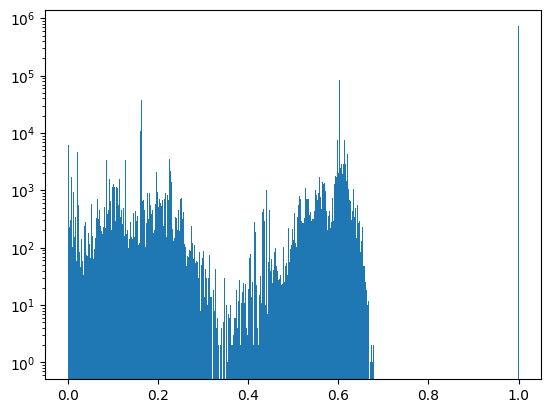

In [31]:
import matplotlib.pyplot as plt

plt.hist(mash_dist["distance"], bins=1000)
plt.yscale("log")
plt.show()


# phage_satellites_functions

In [12]:
annotation = pd.read_parquet("../dataset/Phage_and_Satellites_Pann_Pcat_Pcol.pa")

In [13]:
annotation.head()

,acc,name,start,end,strand,pann,pcat,pcol,translation,what
0,MH669004,MH669004_00001,73,250,-1,hypothetical protein,unknown_no_hit,#F5F5F5,MDDFDTGLQFALQVTGAELATEPPAPDTPLAHVLTFAAEHGPEAVT...,phage
1,MH669004,MH669004_00002,692,1007,1,HNH_endonuclease,"DNA, RNA and nucleotide metabolism",#ffdf59,MPNWEGSDRRSRLPKDWSKIRLRVLRRDGGQCTALTEAGARCVSSA...,phage
2,MH669004,MH669004_00003,1246,1447,1,hypothetical protein,unknown_no_hit,#F5F5F5,MALKYVIDGVSYDFEPTVTRDATTDAKAQAVMAAIEDLNSAIRPEA...,phage
3,MH669004,MH669004_00004,1518,1749,1,hypothetical protein,unknown_no_hit,#F5F5F5,MSGFQWAWLAWGGAFVVIEGIALKRKDKNDTLSEQVWKIFHTEQGQ...,phage
4,MH669004,MH669004_00005,1745,2006,1,hypothetical protein,unknown_no_hit,#F5F5F5,MTQVLYFTSPTCRPCRGFGPLLEAELAERGFEPEKVDISSLAGLEK...,phage


In [14]:
annotation.shape

(2318538, 10)

In [18]:
print(annotation["acc"].nunique())
print(annotation["name"].nunique())
print(annotation["strand"].nunique())
print(annotation["pann"].nunique())
print(annotation["pcat"].nunique())
print(annotation["pcol"].nunique())
print(annotation["translation"].nunique())
print(annotation["what"].nunique())


30407
2318538
2
846
11
11
908357
4


In [19]:
print(annotation["pcat"].unique())
print(annotation["pcol"].unique())
print(annotation["what"].unique())

['unknown_no_hit' 'DNA, RNA and nucleotide metabolism' 'tail'
 'head and packaging' 'connector' 'lysis' 'transcription regulation'
 'integration and excision' 'other'
 'moron, auxiliary metabolic gene and host takeover' 'unknown function']
['#F5F5F5' '#ffdf59' '#07e9a2' '#3e83f6' '#35d7ff' '#f35f49' '#a861e3'
 '#fea328' '#838383' '#ff59f5' '']
['phage' 'P4' 'PICI' 'CFPICI']


In [20]:
annotation["pcat"].value_counts()

pcat
unknown_no_hit                                       1391498
DNA, RNA and nucleotide metabolism                    252511
tail                                                  182345
head and packaging                                    168373
other                                                  82561
lysis                                                  52519
connector                                              47674
transcription regulation                               46522
moron, auxiliary metabolic gene and host takeover      44573
unknown function                                       29353
integration and excision                               20609
Name: count, dtype: int64

"pcat":function, file name
"name": id
"pann": description
"translation": sequence

In [37]:
import os

# Ensure output directory exists (optional)
output_dir = "../dataset/fasta_by_pcat"
os.makedirs(output_dir, exist_ok=True)

for pcat_value in annotation["pcat"].unique():
    # Format the filename: lowercase, replace spaces/commas with underscores, remove other non-alphanumerics
    filename = pcat_value.lower().replace(",", "").replace(" ", "_") + ".fa"
    filepath = os.path.join(output_dir, filename)

    # Select rows for this pcat
    subset = annotation[annotation["pcat"] == pcat_value]

    with open(filepath, "w") as f:
        for _, row in subset.iterrows():
            # Prepare header and sequence
            header = (
                f">{row['name']} {row['pann']}"
                if pd.notna(row["pann"])
                else f">{row['name']}"
            )
            sequence = row["translation"]
            # Write to file
            f.write(f"{header}\n{sequence}\n")

In [2]:
# see the result

connector = list(
    SeqIO.parse(
        "../dataset/fasta_by_pcat/connector.fa",
        "fasta",
    )
)
print(len(connector))
print(connector[0])

47674
ID: MH669004_00012
Name: MH669004_00012
Description: MH669004_00012 head-tail_adaptor_Ad1
Number of features: 0
Seq('MADFATLDELKARLDWTLDADEERIATSALEDASDLARAYAGRDWIPVTTAPRL...EPW')
